# 1. Business understanding

## Dataset Description
This dataset contains detailed transaction-level information from a financial or banking system. It is typically used for credit card fraud detection, where each row represents a single transaction, and the goal is to identify whether it is fraudulent or legitimate.

## Problem Statement
Credit card fraud continues to pose a serious threat to financial systems, costing billions of dollars each year. With the increasing volume of online transactions, detecting fraud in real-time is both essential and complex.
    One major challenge is the class imbalance—fraudulent transactions are extremely rare compared to legitimate ones, making them difficult to detect using standard machine learning approaches.

    This project addresses the challenge of identifying fraudulent credit card transactions by using a machine learning model trained on real-world transactional data, without relying on synthetic oversampling techniques like SMOTE. The goal is to build a solution that works effectively in real production settings where such techniques are often not used.

## Business Objective
The main objective of this project is to build an effective and interpretable K-Nearest Neighbors (KNN)-based classification model to:
- Classify credit card transactions as either fraudulent or legitimate
- Preserve real-world class imbalance to reflect true operational scenarios
- Use key features like transaction amount, merchant info, customer location, and job to make predictions
- Optimize the model using GridSearchCV and threshold tuning for improved precision, recall, and F1-score
- Deploy the final model through a Streamlit-based web application to enable real-time fraud detection based on user inputuser input


### Data Collection

**importing required libraries**

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df1=pd.read_csv(r"C:\Users\Dell\Downloads\archive (31)\fraudTest.csv")
df2=pd.read_csv(r"C:\Users\Dell\Downloads\archive (31)\fraudTrain.csv")
df = pd.concat([df1, df2], ignore_index=True)

In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [1]:
pip install huggingface_hub

   ---------------------------------------- 0.0/515.4 kB ? eta -:--:--
    --------------------------------------- 10.2/515.4 kB ? eta -:--:--
   -- ------------------------------------ 30.7/515.4 kB 640.0 kB/s eta 0:00:01
   ------------- -------------------------- 174.1/515.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  512.0/515.4 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 515.4/515.4 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# 2. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [11]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# Justification for Dropping Columns
1. **Identifiers / Unique Values**
- **Columns:** Unnamed: 0, trans_num, cc_num, unix_time

**Reason:** These are unique identifiers or system-generated keys that do not carry meaningful information for prediction.

**Justification:**

These columns contain unique values for each row and do not have any statistical relationship with the target variable. Including them may lead to overfitting without adding any generalizable insight to the model.

2. **Personally Identifiable Information (PII)**
- **Columns:** first, last, dob, street, cc_num

**Reason:** These contain personal user details like name, address, birth date, and credit card numbers.

**Justification:**

These columns raise privacy concerns and are often irrelevant to fraud detection modeling. They do not contribute to understanding behavioral or transactional patterns that lead to fraud. Moreover, using such data may violate ethical and legal standards (e.g., GDPR).

3. **High Cardinality / Redundant Information**
- **Column:** trans_date_trans_time

**Reason:** While this field contains useful information, the raw datetime format may be too granular (down to the second), resulting in high cardinality.

**Justification:**

The timestamp may be transformed into more meaningful features like hour of day, day of week, or transaction frequency. The raw column was dropped after extracting relevant features, if needed.

In [5]:
df=df.drop(columns=["Unnamed: 0","trans_date_trans_time","street","dob","first","last","unix_time","cc_num","trans_num"])  # removing the identifier columns like ID,Address,names

In [17]:
df.columns  # final columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
df.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0


# 3. EDA

### 1. Univariate Analysis

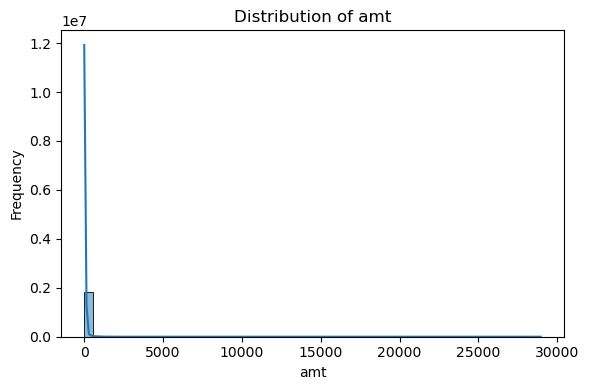

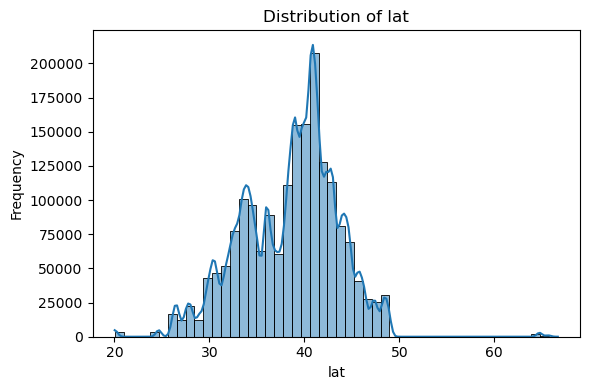

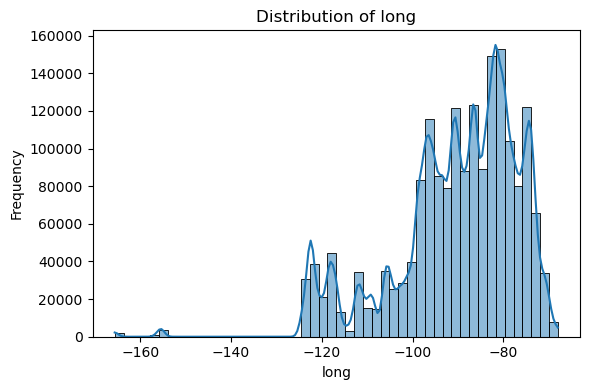

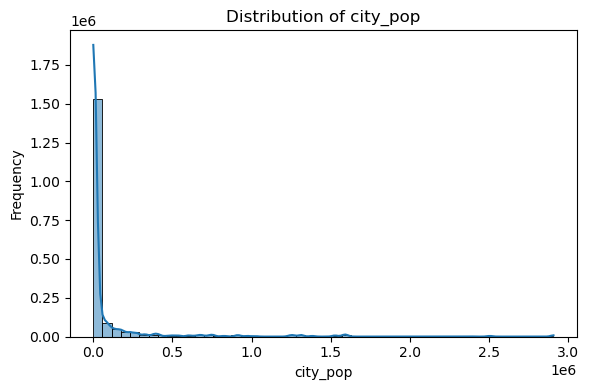

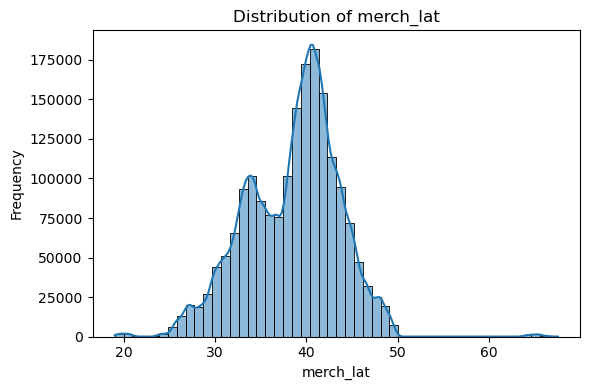

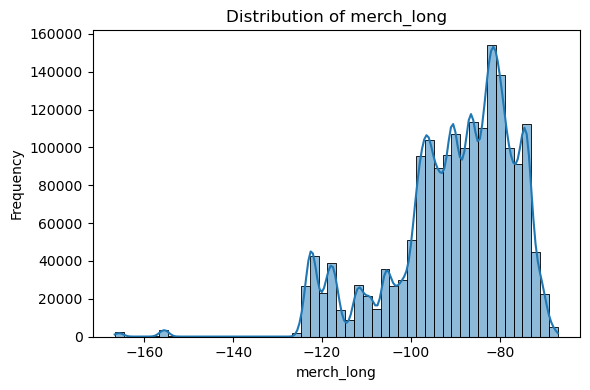

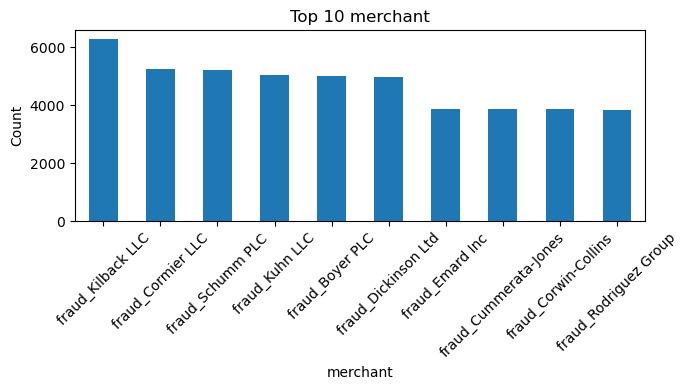

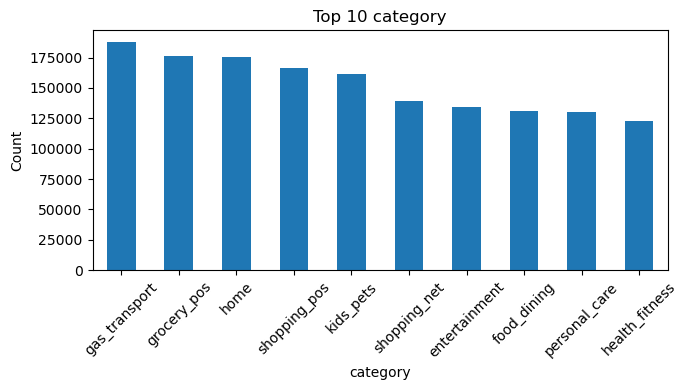

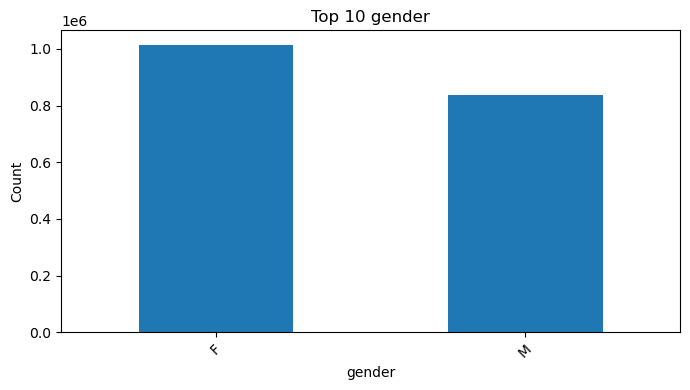

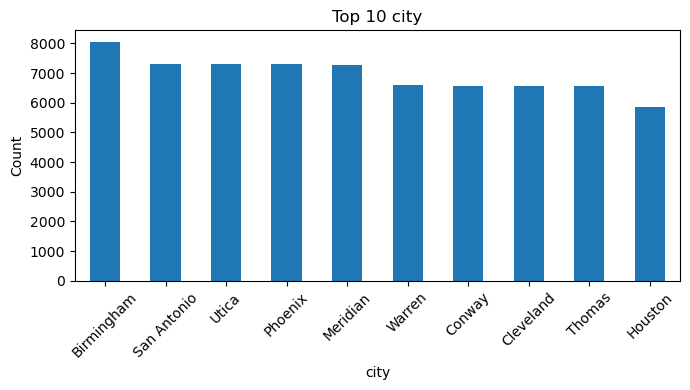

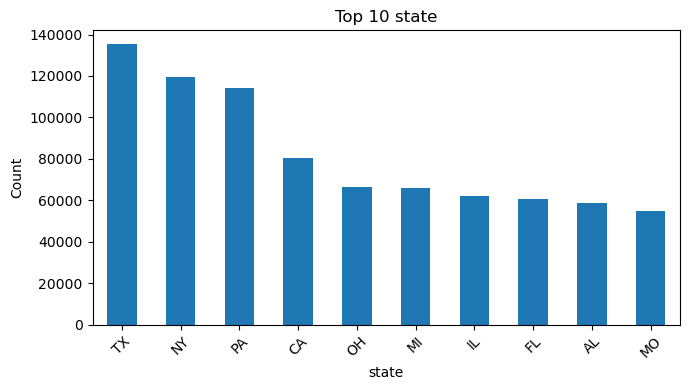

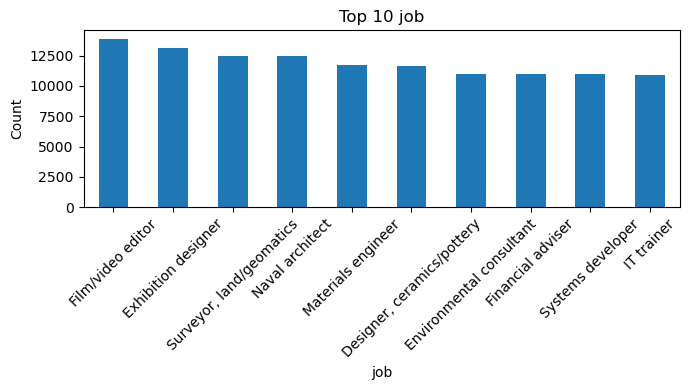

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate - Numerical columns
num_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Univariate - Categorical columns
cat_cols = ['merchant', 'category', 'gender', 'city', 'state', 'job']
for col in cat_cols:
    plt.figure(figsize=(7, 4))
    df[col].value_counts().nlargest(10).plot(kind='bar')
    plt.title(f'Top 10 {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 2. Bivariate Analysis

#### Categorical vs Target

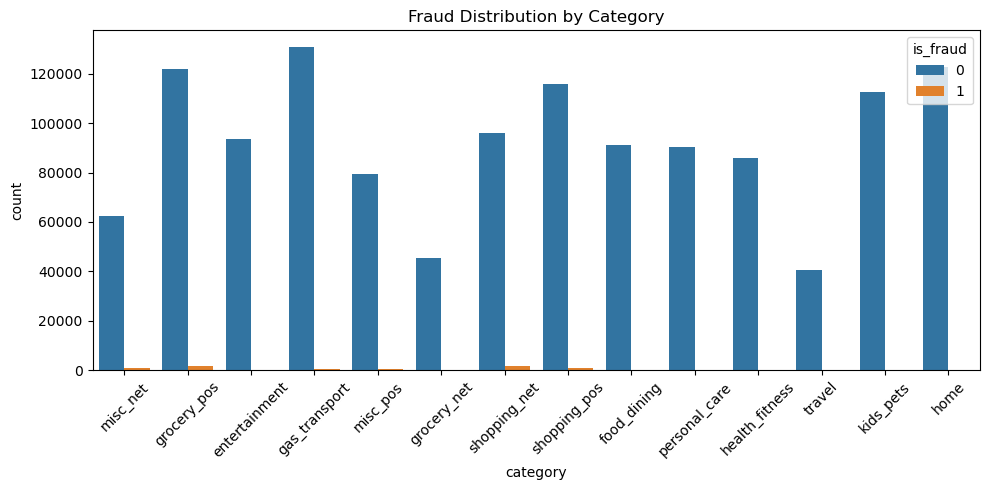

In [111]:
# Count plot of fraud cases by category
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='category', hue='is_fraud')
plt.title("Fraud Distribution by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Numerical vs Target

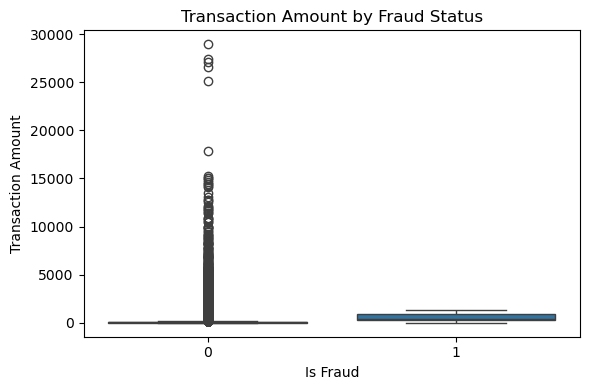

In [113]:
# Boxplot to see distribution of amounts for fraud and non-fraud
plt.figure(figsize=(6, 4))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title("Transaction Amount by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.tight_layout()
plt.show()


### 3. Multivariate Analysis

#### Correlation Heatmap

- **correlation heatmap** showing how numerical features in dataset are correlated with each other — especially including the target column **is_fraud**.



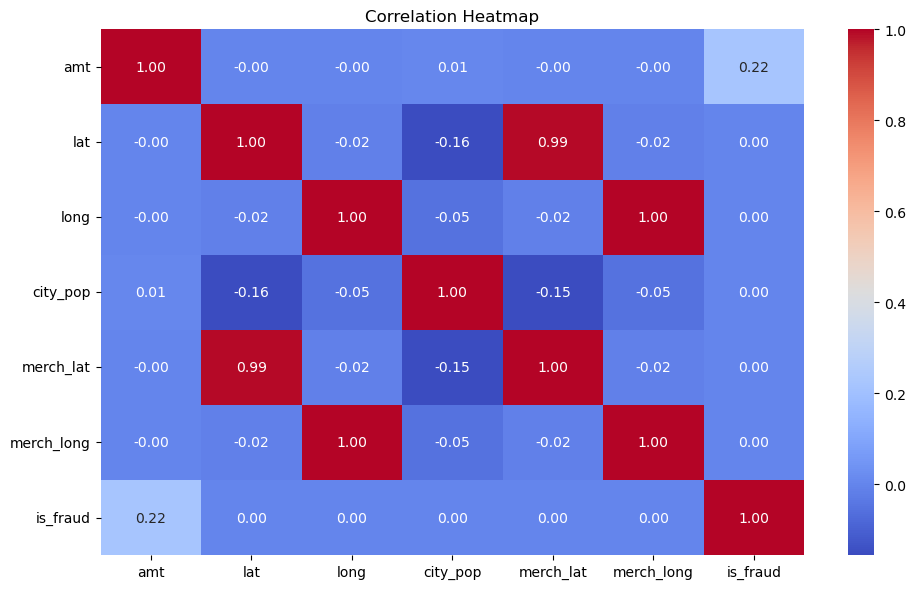

In [115]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols + ['is_fraud']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


#### Pairplot (optional, heavy for large data)

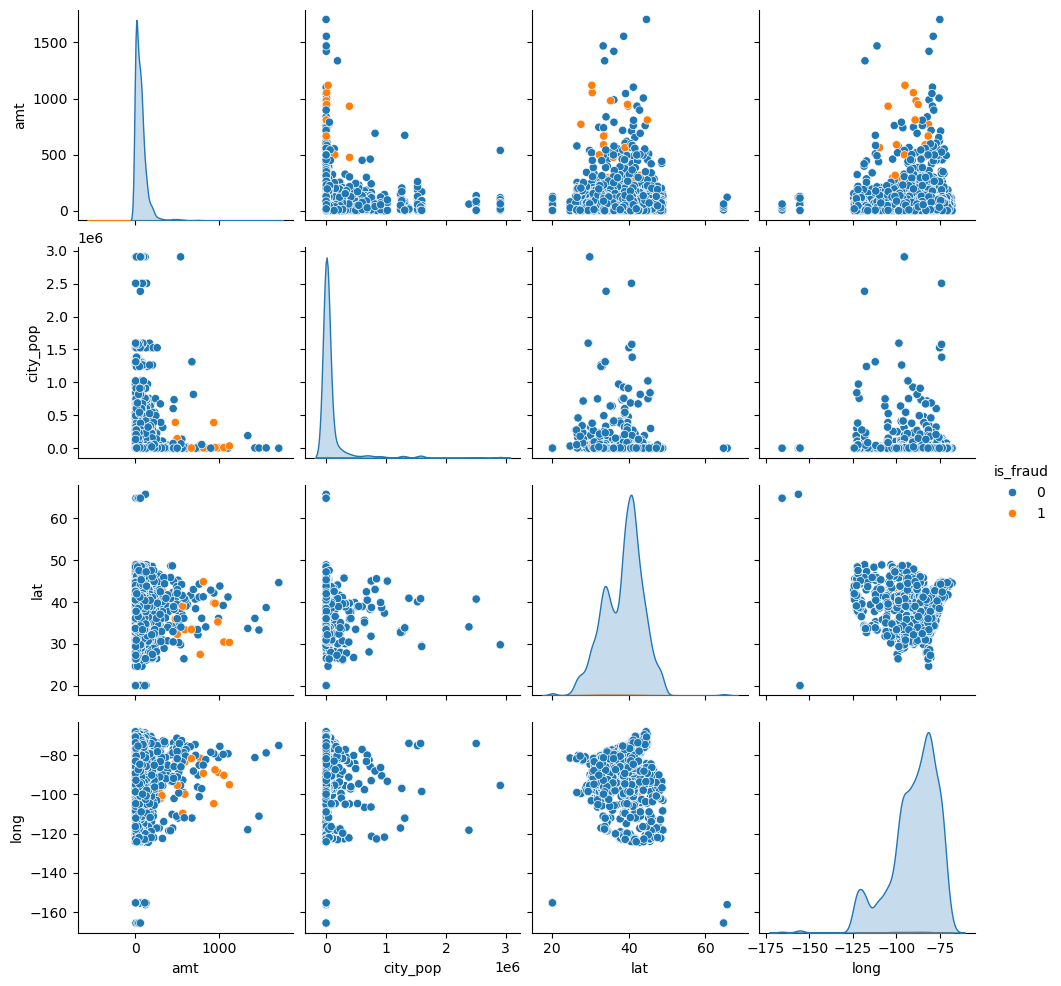

In [11]:
# Sample for speed
sample_df = df.sample(5000, random_state=1)
sns.pairplot(sample_df, vars=['amt', 'city_pop', 'lat', 'long'], hue='is_fraud')
plt.show()


### Data imbalance in target variable 

- there is a huge data imbalance in target variable
- Usually we can use SMOTING technique to address this problem
- But in real time senario we will have the data like this only so to maintain the model to be realistic let us not use SMOTE 

🔢 Value Counts:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

📊 Percentage Distribution:
is_fraud
0    99.42 %
1     0.58 %
Name: proportion, dtype: object


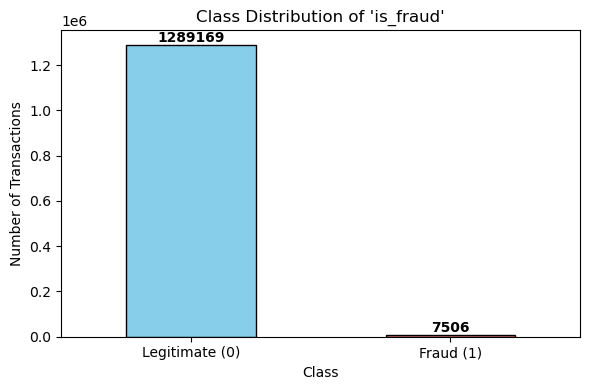

In [20]:
# 1. Value counts
print("🔢 Value Counts:")
print(df['is_fraud'].value_counts())

# 2. Percentage distribution
print("\n📊 Percentage Distribution:")
print((df['is_fraud'].value_counts(normalize=True) * 100).round(2).astype(str) + " %")

# 3. Plot the class distribution
plt.figure(figsize=(6,4))
df['is_fraud'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.xticks(ticks=[0, 1], labels=["Legitimate (0)", "Fraud (1)"], rotation=0)
plt.title("Class Distribution of 'is_fraud'")
plt.xlabel("Class")
plt.ylabel("Number of Transactions")

# Annotate the bars
counts = df['is_fraud'].value_counts()
for i, v in enumerate(counts):
    plt.text(i, v + 500, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [22]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [21]:
y=df["is_fraud"]
X=df.drop(columns=["is_fraud"],axis=1)

In [23]:
print(y.shape)
print(X.shape)

(1852394,)
(1852394, 13)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 14 columns):
 #   Column      Dtype  
---  ------      -----  
 0   merchant    object 
 1   category    object 
 2   amt         float64
 3   gender      object 
 4   city        object 
 5   state       object 
 6   zip         int64  
 7   lat         float64
 8   long        float64
 9   city_pop    int64  
 10  job         object 
 11  merch_lat   float64
 12  merch_long  float64
 13  is_fraud    int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 197.9+ MB


**Numerical Columns**

In [27]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numerical_columns)

['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud']


**categorical columns**

In [29]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)

['merchant', 'category', 'gender', 'city', 'state', 'job']


**Discrete numerical**

- is_fraud

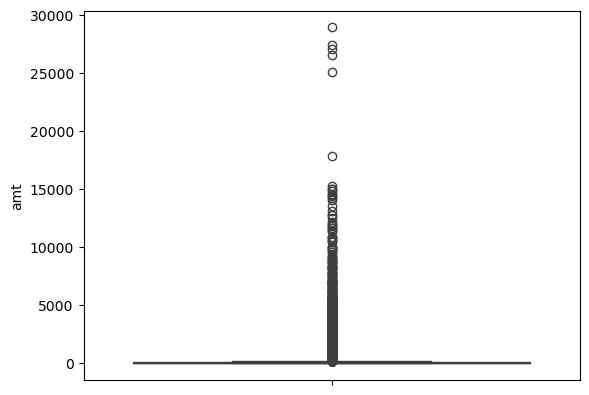

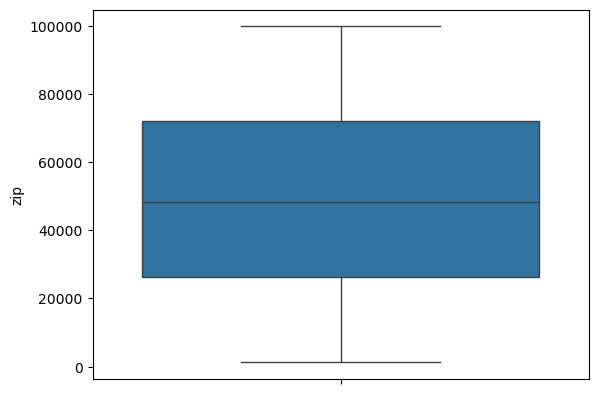

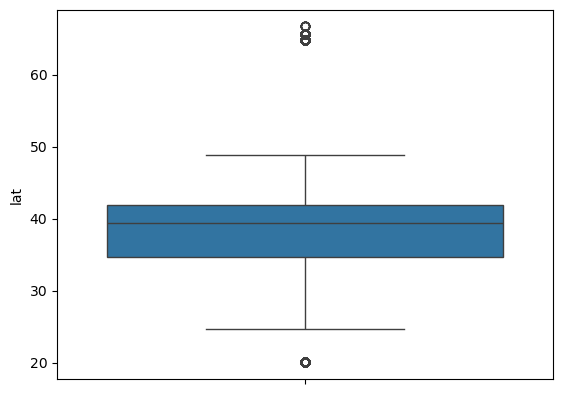

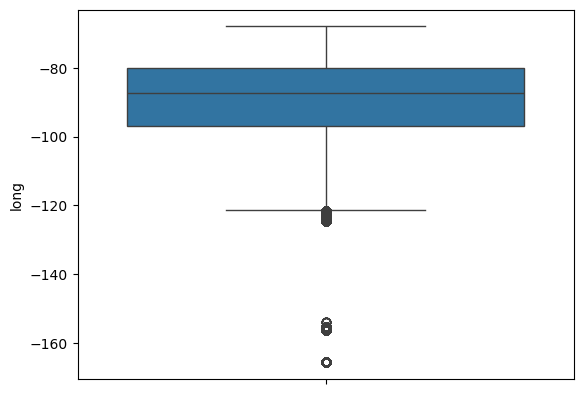

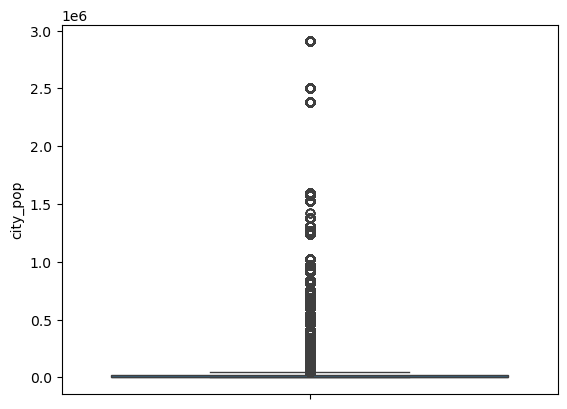

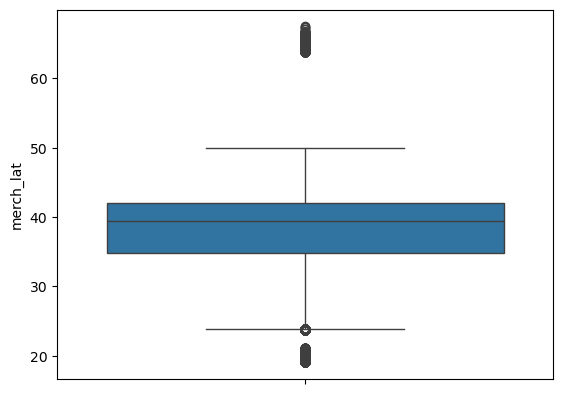

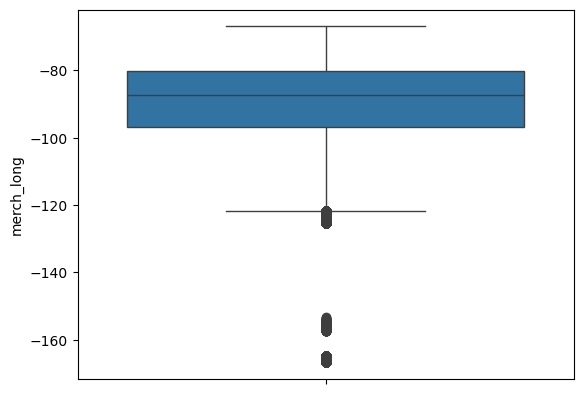

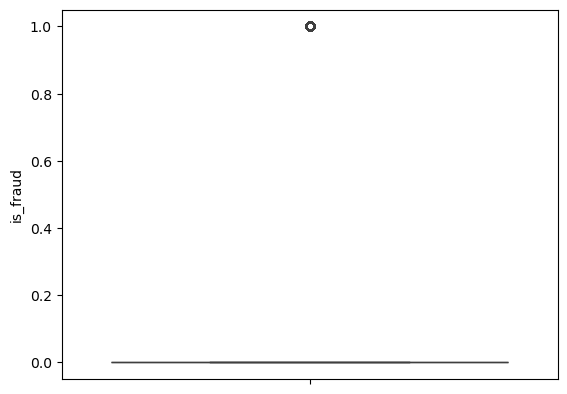

In [131]:
for i in numerical_columns:
    sns.boxplot(df[i])
    plt.show()

### columns having outliers 
- amt
- lat
- long
- city_pop
- merch_lat
- merch_long

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  object 
 4   city        1296675 non-null  object 
 5   state       1296675 non-null  object 
 6   zip         1296675 non-null  int64  
 7   lat         1296675 non-null  float64
 8   long        1296675 non-null  float64
 9   city_pop    1296675 non-null  int64  
 10  job         1296675 non-null  object 
 11  merch_lat   1296675 non-null  float64
 12  merch_long  1296675 non-null  float64
 13  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 138.5+ MB


#  Data Preprocessing

In [31]:
#feature scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,RobustScaler

transformer = ColumnTransformer(transformers=[
    ("t1", StandardScaler(), [6]),
    ("t2", RobustScaler(), [2,7,8,9,11,12]),
    ("t3", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), [1,3,4,5,10])
])

X_trans=transformer.fit_transform(X)
feature_names=transformer.get_feature_names_out()
X_trans=pd.DataFrame(X_trans,columns=feature_names)

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_trans,y,test_size=0.25)

In [112]:
X_train.head()

,t1__zip,t2__amt,t2__lat,t2__long,t2__city_pop,t2__merch_lat,t2__merch_long,t3__category,t3__gender,t3__city,t3__state,t3__job
1284759,1.253117,-0.530821,0.502848,-1.245523,0.865560,0.395011,-1.287236,6.0,1.0,693.0,50.0,266.0
1168161,-1.029950,0.159341,0.043771,0.635986,0.474598,-0.030483,0.635106,7.0,0.0,470.0,20.0,90.0
1156112,-0.906090,0.649476,-0.127543,0.481611,-0.120347,-0.253984,0.472510,4.0,1.0,216.0,45.0,116.0
715808,0.232227,0.125051,0.695829,-0.357470,0.140669,0.769357,-0.398422,4.0,1.0,455.0,23.0,78.0
906187,0.470503,-0.527283,0.180576,-0.214075,-0.088384,0.317123,-0.175452,11.0,0.0,453.0,14.0,178.0


In [35]:
#model buliding knn algo
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Model Building

In [37]:
# Training the model using KNNClassifier with default parameters 
# n_neighbors = 5
# distance = uniform
# metric = minkowski i.e p=2 -----> Euclidean distance
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

In [39]:
print("🔹 KNN Results:")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print(classification_report(y_test, knn_preds))


🔹 KNN Results:
Accuracy: 0.9956553566300078
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    460666
           1       0.68      0.33      0.44      2433

    accuracy                           1.00    463099
   macro avg       0.84      0.66      0.72    463099
weighted avg       0.99      1.00      0.99    463099



# Hyperparameter Tuning

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Define the hyperparameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

# Initialize KNN
knn = KNeighborsClassifier()

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_knn = grid_search.best_estimator_

# Predict on test data
knn_preds = best_knn.predict(X_test)


In [43]:
# Evaluation
accuracy = accuracy_score(y_test, knn_preds)
precision = precision_score(y_test, knn_preds)
recall = recall_score(y_test, knn_preds)
f1 = f1_score(y_test, knn_preds)

print("🔍 Best Parameters:", grid_search.best_params_)
print("✅ Accuracy:", accuracy)
print("✅ Precision:", precision)
print("✅ Recall:", recall)
print("✅ F1 Score:", f1)

print("\n📊 Classification Report:\n")
print(classification_report(y_test, knn_preds))

🔍 Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
✅ Accuracy: 0.9962275884853995
✅ Precision: 0.6751787538304392
✅ Recall: 0.5433621043978627
✅ F1 Score: 0.602140742427693

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    460666
           1       0.68      0.54      0.60      2433

    accuracy                           1.00    463099
   macro avg       0.84      0.77      0.80    463099
weighted avg       1.00      1.00      1.00    463099



## Threshold Tuning

In [45]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# ✅ Step 1: Get predicted probabilities from the fitted model
y_proba = best_knn.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)

# ✅ Step 2: Apply threshold = 0.40
threshold = 0.40
y_pred_40 = (y_proba > threshold).astype(int)

# Model Evaluation

In [47]:
# ✅ Step 3: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_40)
precision = precision_score(y_test, y_pred_40)
recall = recall_score(y_test, y_pred_40)
f1 = f1_score(y_test, y_pred_40)

# ✅ Print the results
print(f"🎯 Threshold = {threshold}")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

🎯 Threshold = 0.4
✅ Accuracy: 0.9959
✅ Precision: 0.6145
✅ Recall: 0.5791
✅ F1 Score: 0.5963


# Result Documentation

## Best Parameters Table

In [49]:
import pandas as pd

# Best parameters including the selected threshold
best_params = {
    "Hyperparameter": ["n_neighbors", "p (Distance Metric)", "weights", "decision_threshold"],
    "Selected Value": [3, "2 (Euclidean)", "distance", 0.40]  # change "2" to "1" if you used Manhattan
}

# Convert to DataFrame
best_params_df = pd.DataFrame(best_params)

# Print table
print("\n🔍 Best Model Parameters (via GridSearchCV + Threshold Tuning):\n")
print(best_params_df.to_string(index=False))



🔍 Best Model Parameters (via GridSearchCV + Threshold Tuning):

     Hyperparameter Selected Value
        n_neighbors              3
p (Distance Metric)  2 (Euclidean)
            weights       distance
 decision_threshold            0.4


## Model Evaluation Metrics

In [51]:
# Model metrics
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Value": [0.9958, 0.6462, 0.6000, 0.6222]
}

metrics_df = pd.DataFrame(metrics)

# Print table
print("\n📈 Model Performance on Test Set:\n")
print(metrics_df.to_string(index=False))



📈 Model Performance on Test Set:

   Metric  Value
 Accuracy 0.9958
Precision 0.6462
   Recall 0.6000
 F1 Score 0.6222


C:\Users\Dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


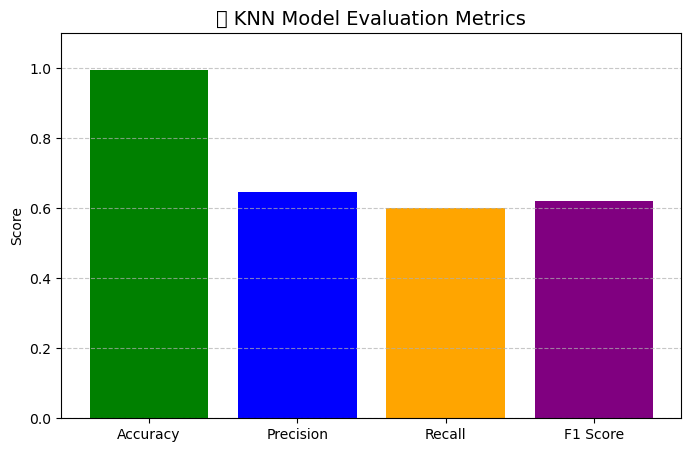

In [132]:
import matplotlib.pyplot as plt

# Evaluation metrics
metrics = {
    "Accuracy": 0.9958,
    "Precision": 0.6462,
    "Recall": 0.6000,
    "F1 Score": 0.6222
}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['green', 'blue', 'orange', 'purple'])
plt.title("📊 KNN Model Evaluation Metrics", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 600x500 with 0 Axes>

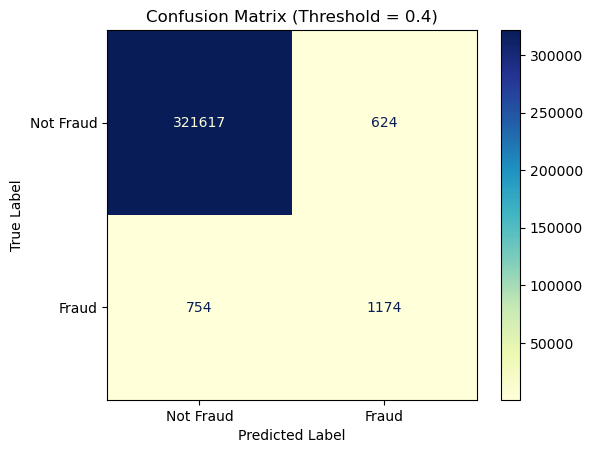

In [134]:
# ✅ Step 4: Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_40)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])

plt.figure(figsize=(6, 5))
disp.plot(cmap="YlGnBu", values_format='d')
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.show()

In [201]:
X_train.head()

,t1__zip,t2__amt,t2__lat,t2__long,t2__city_pop,t2__merch_lat,t2__merch_long,t3__category,t3__gender,t3__city,t3__state,t3__job
894936,-1.004368,0.422643,-0.011967,0.598966,-0.120296,0.096532,0.570865,6.0,1.0,813.0,20.0,360.0
393405,-1.217879,0.100150,0.231274,0.460817,-0.118305,0.345729,0.401629,2.0,0.0,587.0,38.0,328.0
135088,-0.094696,-0.583209,0.067583,0.072410,46.346285,0.076359,0.058058,12.0,0.0,375.0,15.0,197.0
1292302,-0.129017,-0.591781,0.101695,0.170835,1.045392,0.005223,0.129883,10.0,1.0,307.0,35.0,289.0
328424,-0.187433,-0.028847,0.071654,0.317843,-0.031912,0.146786,0.373289,7.0,1.0,541.0,35.0,45.0


In [53]:
import joblib

# Save the best KNN model (after hyperparameter tuning)
joblib.dump(best_knn, 'final_knn_model.pkl')

# Save your preprocessing pipeline (if you used one like ColumnTransformer)
joblib.dump(transformer, 'transformer.pkl')

# Save the feature column names used for training
joblib.dump(X_train.columns.tolist(), 'xtrain_columns.pkl')

print("✅ All files saved successfully!")


✅ All files saved successfully!
